## Parcial 4 (80%).

### Lea las siguientes instrucciones y resuelva el parcial.



*   Lea cada numeral que se encuentra a continuación. Resuelva utilizando este notebook
*   El parcial debe enviarse haciendo uso de git. No se reciben archivos de otra forma. Tenga en cuenta que se debe subir usando git bash y no cargar desde la web, los archivos que se suban desde la web serán descartados.



### Punto 1

Utilice programación orientada a objetos POO para crear un sistema o máquina de la siguiente forma.



*   El sistema tiene 3 luces, una roja para las alarmas, una verde para el funcionamiento y una amarilla para las alertas.
*   El sistema tiene un sensor de presión en bares, un sensor de tensión eléctrica en voltios y un sensor de velocidad en RPMs.
*   El sistema muestra alertas con la luz amarilla si hay algún sensor fuera del rango de operación. Esto es, de 0 a 10 bares, de 120 a 240 voltios y de 8 a 12 RPMs.
*   El sistema muestra alarma si hay 2 sensores o más fuera del rango de operación.
*   Las RPMs vienen de un motor que depende de la corriente para modificar su velocidad, esta corriente a su vez depende del voltaje sabiendo que la potencia es un valor fijo que ud seleccionará. Recuerde que P = V.I.
*   Al incio las variables de operación deben iniciar en un valor dentro del rango, se da un start para inciar el proceso y se debe simular el funcionamiento del sistema con variables aleatorias para los sensores y corriente del motor. Además se debe mostrar los tiempos de alerta, alarma y funcionamiento del motor con un método de mostrar_informacion().
* Utilice al menos 4 métodos.



### Punto 2

Utilice la base de datos de NBA para realizar:

* Un filtrado básico de los datos eliminando datos faltantes, datos atípicos, haciendo descripción de estadísticas básicas
* Al menos 5 gráficas diferentes informativas (al menos 3 tipos diferentes de gráficas y puede combinar con las variables a usar). Usted selecciona las variables de interés y lo que desea analizar.




### Punto 3

Utilice la carpeta audios para:

* Cargar los audios y graficar las ondas en un gráfica con múltiples plots.
* Mostrar el espectrograma de cada audio usando múltiples plots.
* Tratar de filtrar en el audio más largo que es de una finca de animales algún sonido particular de algún animal.

In [66]:
import random
import time


class Sensor:
    def __init__(self, tipo, min_valor, max_valor):
        self.tipo = tipo
        self.min_valor = min_valor
        self.max_valor = max_valor
        self.valor = random.uniform(min_valor, max_valor)

    def actualizar_valor(self):
        self.valor = random.uniform(self.min_valor, self.max_valor)
        return self.valor

    def esta_fuera_de_rango(self):
        return not (self.min_valor <= self.valor <= self.max_valor)


class Luz:
    def __init__(self, color):
        self.color = color
        self.estado = False

    def encender(self):
        self.estado = True

    def apagar(self):
        self.estado = False


class Sistema:
    def __init__(self, potencia):
        self.luz_roja = Luz('roja')
        self.luz_amarilla = Luz('amarilla')
        self.luz_verde = Luz('verde')
        self.sensor_presion = Sensor('presion', 0, 10)
        self.sensor_tension = Sensor('tension', 120, 240)
        self.sensor_rpm = Sensor('rpm', 8, 12)
        self.potencia = potencia
        self.tiempo_alerta = 0
        self.tiempo_alarma = 0
        self.tiempo_funcionamiento = 0

    def iniciar_sistema(self):
        self.luz_verde.encender()
        inicio = time.time()

        while time.time() - inicio < 10:  # Simulación durante 10 segundos
            self.simular_sistema()
            time.sleep(1)

        self.mostrar_informacion()

    def simular_sistema(self):
        fuera_de_rango = 0
        
        presion = self.sensor_presion.actualizar_valor()
        tension = self.sensor_tension.actualizar_valor()
        
        
        corriente = self.potencia / tension
        
        
        rpm = random.uniform(8, 12) * corriente / 10
        self.sensor_rpm.valor = rpm

        if self.sensor_presion.esta_fuera_de_rango():
            fuera_de_rango += 1
        if self.sensor_tension.esta_fuera_de_rango():
            fuera_de_rango += 1
        if self.sensor_rpm.esta_fuera_de_rango():
            fuera_de_rango += 1

        if fuera_de_rango >= 2:
            self.luz_roja.encender()
            self.luz_amarilla.apagar()
            self.tiempo_alarma += 1
        elif fuera_de_rango == 1:
            self.luz_amarilla.encender()
            self.luz_roja.apagar()
            self.tiempo_alerta += 1
        else:
            self.luz_verde.encender()
            self.luz_amarilla.apagar()
            self.luz_roja.apagar()
            self.tiempo_funcionamiento += 1

    def mostrar_informacion(self):
        print(f"Tiempo de funcionamiento: {self.tiempo_funcionamiento} segundos")
        print(f"Tiempo de alerta: {self.tiempo_alerta} segundos")
        print(f"Tiempo de alarma: {self.tiempo_alarma} segundos")


sistema = Sistema(potencia=2000)
sistema.iniciar_sistema()

Tiempo de funcionamiento: 6 segundos
Tiempo de alerta: 4 segundos
Tiempo de alarma: 0 segundos


In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
pd.read_csv("all_seasons.csv")

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [70]:
DF=pd.read_csv("all_seasons.csv")
DF["player_name"]

0        Randy Livingston
1        Gaylon Nickerson
2            George Lynch
3          George McCloud
4            George Zidek
               ...       
12839         Joel Embiid
12840     John Butler Jr.
12841        John Collins
12842        Jericho Sims
12843      JaMychal Green
Name: player_name, Length: 12844, dtype: object

In [71]:
DF=pd.read_csv("all_seasons.csv")
DF["college"]

0              Louisiana State
1        Northwestern Oklahoma
2               North Carolina
3                Florida State
4                         UCLA
                 ...          
12839                   Kansas
12840            Florida State
12841              Wake Forest
12842                    Texas
12843                  Alabama
Name: college, Length: 12844, dtype: object

In [72]:
DF=pd.read_csv("all_seasons.csv")
DF["age"]

0        22.0
1        28.0
2        26.0
3        30.0
4        23.0
         ... 
12839    29.0
12840    20.0
12841    25.0
12842    24.0
12843    33.0
Name: age, Length: 12844, dtype: float64

In [73]:
DF=pd.read_csv("all_seasons.csv")
DF.iloc[0]

Unnamed: 0                          0
player_name          Randy Livingston
team_abbreviation                 HOU
age                              22.0
player_height                  193.04
player_weight               94.800728
college               Louisiana State
country                           USA
draft_year                       1996
draft_round                         2
draft_number                       42
gp                                 64
pts                               3.9
reb                               1.5
ast                               2.4
net_rating                        0.3
oreb_pct                        0.042
dreb_pct                        0.071
usg_pct                         0.169
ts_pct                          0.487
ast_pct                         0.248
season                        1996-97
Name: 0, dtype: object

In [74]:
DF["pts"].max()

36.1

In [75]:
var =DF["pts"]

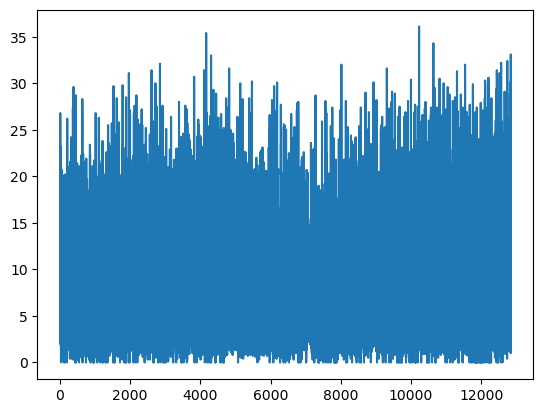

In [76]:
plt.plot(var)

In [77]:
DF["net_rating"].min()

-250.0

In [78]:
var =DF["net_rating"]

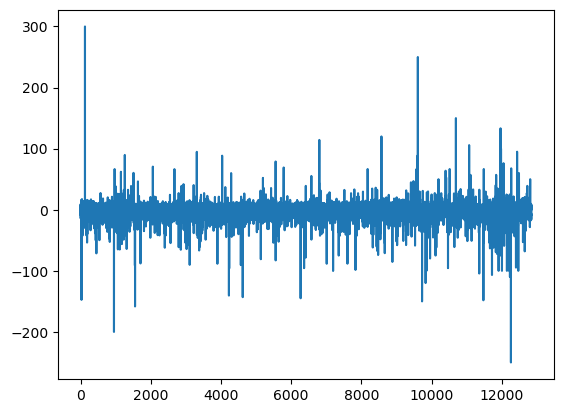

In [79]:
plt.plot(var)

In [92]:
DF["usg_pct"].max()

1.0

In [93]:
var =DF["usg_pct"]

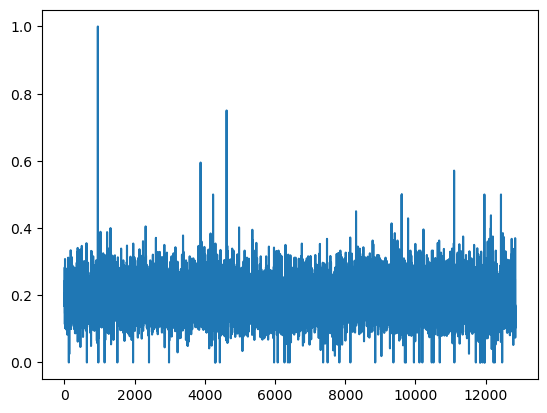

In [94]:
plt.plot(var)

In [86]:
DF["season"].min()

'1996-97'

In [87]:
var =DF["season"]

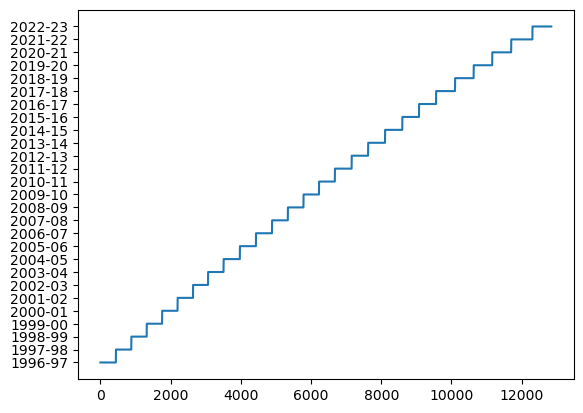

In [88]:
plt.plot(var)

In [95]:
DF["ts_pct"]

0        0.487
1        0.497
2        0.512
3        0.527
4        0.500
         ...  
12839    0.655
12840    0.411
12841    0.593
12842    0.780
12843    0.650
Name: ts_pct, Length: 12844, dtype: float64

In [96]:
var =DF["ts_pct"]

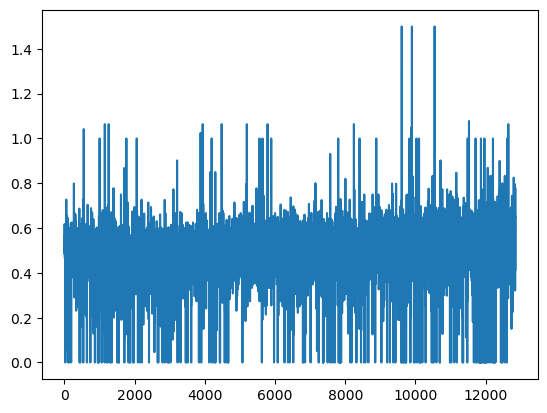

In [97]:
plt.plot(var)

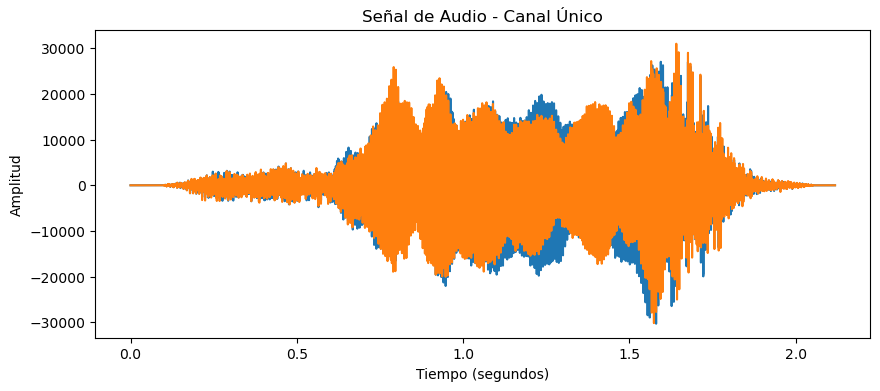

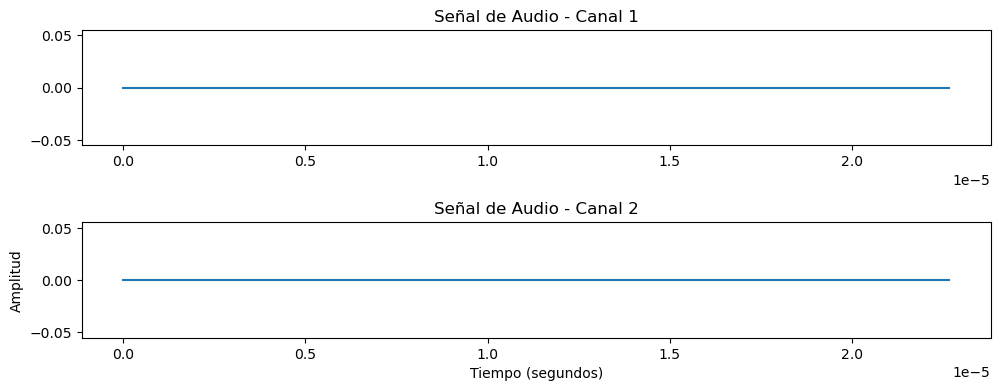

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

class AudioProcessor:
    def __init__(self, file_path):
        self.file_path = file_path

    def extract_first_30_seconds(self):
        y, sr = sf.read(self.file_path, dtype='int16')
        return y, sr

    def plot_signal(self, single_channel=True):
        signal, sr = self.extract_first_30_seconds()

        plt.figure(figsize=(10, 4))

        if single_channel:
            plt.plot(np.arange(len(signal)) / sr, signal)
            plt.title('Señal de Audio - Canal Único')
        else:
            plt.subplot(2, 1, 1)
            plt.plot(np.arange(len(signal[0])) / sr, signal[0])
            plt.title('Señal de Audio - Canal 1')

            plt.subplot(2, 1, 2)
            plt.plot(np.arange(len(signal[1])) / sr, signal[1])
            plt.title('Señal de Audio - Canal 2')

            plt.tight_layout()

        plt.xlabel('Tiempo (segundos)')
        plt.ylabel('Amplitud')
        plt.show()

#clase AudioProcessor
file_path = "C:/Users/Luis/Music/mixkit-cow-moo-in-the-barn-1751.wav"
processor = AudioProcessor(file_path)

# graficar un solo canal
processor.plot_signal(single_channel=True)

# graficar dos canales
processor.plot_signal(single_channel=False)

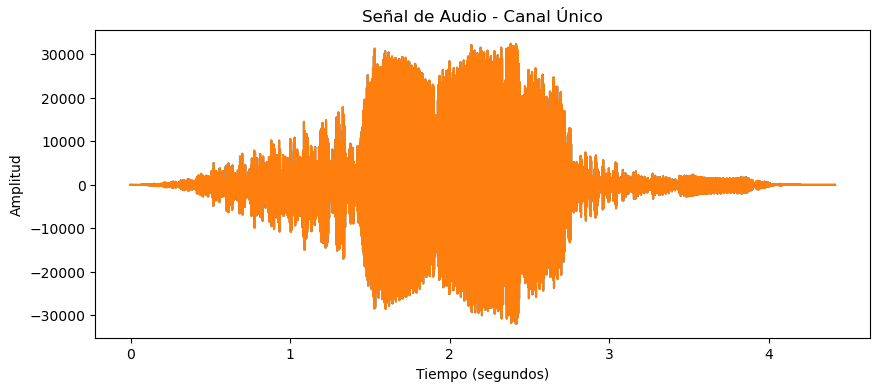

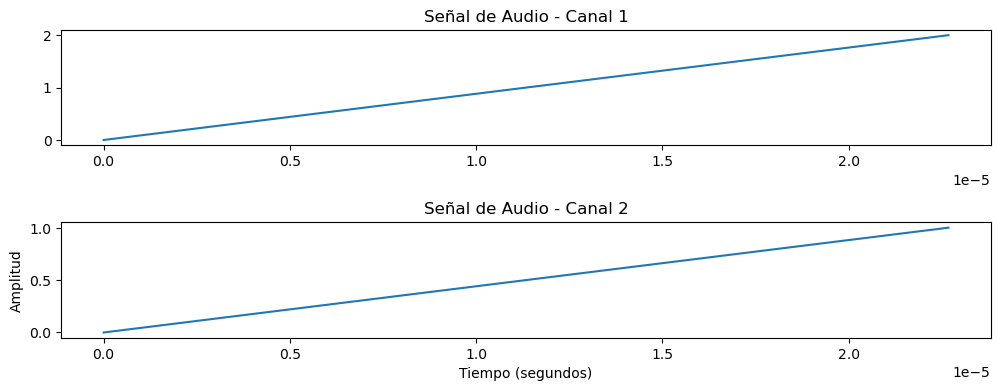

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

class AudioProcessor:
    def __init__(self, file_path):
        self.file_path = file_path

    def extract_first_30_seconds(self):
        y, sr = sf.read(self.file_path, dtype='int16')
        return y, sr

    def plot_signal(self, single_channel=True):
        signal, sr = self.extract_first_30_seconds()

        plt.figure(figsize=(10, 4))

        if single_channel:
            plt.plot(np.arange(len(signal)) / sr, signal)
            plt.title('Señal de Audio - Canal Único')
        else:
            plt.subplot(2, 1, 1)
            plt.plot(np.arange(len(signal[0])) / sr, signal[0])
            plt.title('Señal de Audio - Canal 1')

            plt.subplot(2, 1, 2)
            plt.plot(np.arange(len(signal[1])) / sr, signal[1])
            plt.title('Señal de Audio - Canal 2')

            plt.tight_layout()

        plt.xlabel('Tiempo (segundos)')
        plt.ylabel('Amplitud')
        plt.show()

#  clase AudioProcessor
file_path = "C:/Users/Luis/Music/mixkit-big-wild-cat-slow-moan-90.wav"
processor = AudioProcessor(file_path)

# graficar un solo canal
processor.plot_signal(single_channel=True)

# graficar dos canales
processor.plot_signal(single_channel=False)

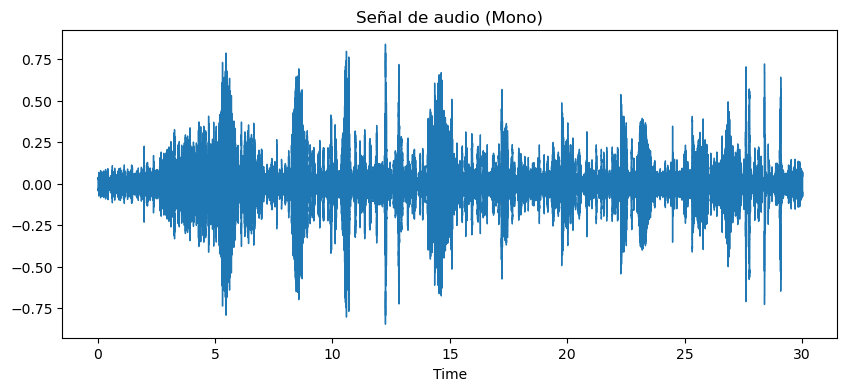

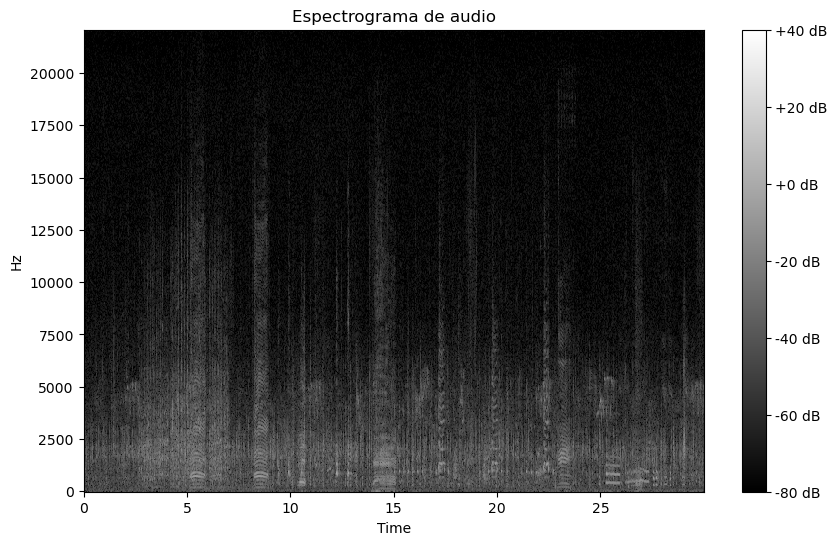

In [104]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, iirnotch

class Audioruta:
    def __init__(self, ruta_archivo):
        self.audio, self.sr = librosa.load(ruta_archivo, sr=None)
        self.audio = self.audio[:int(self.sr * 30)]  

    def graficar_senal(self, mono=True):
        plt.figure(figsize=(10, 4))
        if mono:
            plt.title('Señal de audio (Mono)')
            librosa.display.waveshow(self.audio, sr=self.sr)
        else:
            plt.subplot(2, 1, 1)
            plt.title('Canal Izquierdo')
            librosa.display.waveshow(self.audio[0], sr=self.sr)
            plt.subplot(2, 1, 2)
            plt.title('Canal Derecho')
            librosa.display.waveshow(self.audio[1], sr=self.sr)
        plt.show()

    def graficar_espectrograma(self, escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        plt.figure(figsize=(10, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    def guardar_espectrograma(self, nombre_archivo="espectrograma_default.png", escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(nombre_archivo)
        plt.close()

    def butter_lowpass(self, cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def lowpass_filter(self, data, cutoff, fs, order=5):
        b, a = self.butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        return y

    def iirnotch_filter(self, data, freq, fs, Q):
        b, a = iirnotch(freq, Q, fs)
        y = lfilter(b, a, data)
        return y

    def filtrar_audio_notch(self, freq, Q=30):
        self.audio = self.iirnotch_filter(self.audio, freq, self.sr, Q)

ruta_archivo = file_path = "C:/Users/Luis/Music/mixkit-farm-animals-in-the-morning-7.wav"
audio = Audioruta(ruta_archivo)

# Filtrar el audio para eliminar una frecuencia específica (por ejemplo, 1000 Hz)
notch_freq = 1000  # Frecuencia que se quiere eliminar
audio.filtrar_audio_notch(notch_freq)

# Graficar la señal filtrada y el espectrograma
audio.graficar_senal(mono=True)
audio.graficar_espectrograma(escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)
audio.guardar_espectrograma("espectrograma_filtrado.png", escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)